In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ny=80
nx=420
nin=100
nh=20
nw=20
ns=20       
num=4

In [9]:
eps_solid=0.01  

In [10]:
eps=np.ones([nx,ny])
for k in np.arange(0,num):
    for i in np.arange(0,nx):
        for j in np.arange(0,ny):
            if j>=(ny/2)-(nh/2) and j<(ny/2)+(nh/2):
                if i>=nin+k*(nw+ns) and i<nin+k*(nw+ns)+nw:
                    eps[i,j]=eps_solid


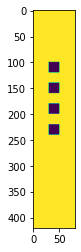

In [11]:
fig, ax = plt.subplots()
ax.imshow(eps)

In [12]:
eps_internal_field=list()
eps_internal_field.append(f"{str(nx*ny)}\n")
eps_internal_field.append("(\n")
for j in np.arange(0,ny):
    for i in np.arange(0,nx):
        eps_internal_field.append(f"{str(eps[i,j])}\n")
eps_internal_field.append(")\n")
eps_internal_field.append(";\n")


In [13]:
with open("./eps_temple","r") as fp:
    eps_temple=fp.readlines()
internal_field_line_index=0
for index,line in enumerate(eps_temple):
    if line.startswith("internalField"):
        internal_field_line_index=index
        for i in range(len(eps_internal_field)):
            eps_temple.insert(internal_field_line_index+1+i,eps_internal_field[i])
        break

with open("./0/eps","w") as fp:
    fp.writelines(eps_temple)